Executando as dependencia do GoogleDrive

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Executando as dependencias do projeto

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carrega o dataset da pasta do GoogleDrive

In [0]:
url = 'https://drive.google.com/open?id=1LC05sKlW2AIUxm-v33c_UebF9t_V14pF'
fluff, id = url.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  

## Faz a leitura do dataset

In [0]:
df = pd.read_csv('Filename.csv') # leitura do dataset
df['Date'] = pd.to_datetime(df.Date) # Transforma a coluna Date para datetime
df = df.sort_values(['Date']) # Ordena a data

In [5]:
df

,Hash,File_Name,Extension,ContributorName,ContributorEmail,CommitterName,Committeremail,Date,addLines,excLines,linesOfCode,Complexity,changeType,Project_Name
13774,7f777ed95a19224294949e1b4ce56bbffcb1fe9f,Makefile,bpo-33873,Guido van Rossum,guido@python.org,Guido van Rossum,guido@python.org,1990-08-09 14:25:15,29,0,19,0,ADD,cpython-3.6.5
13775,7f777ed95a19224294949e1b4ce56bbffcb1fe9f,README,bpo-33873,Guido van Rossum,guido@python.org,Guido van Rossum,guido@python.org,1990-08-09 14:25:15,25,0,19,0,ADD,cpython-3.6.5
13776,b829a0935bbd3dea4898bf68b6be69b59bffcbec,Makefile,bpo-33873,Guido van Rossum,guido@python.org,Guido van Rossum,guido@python.org,1990-09-18 10:47:40,9,7,21,0,MODIFY,cpython-3.6.5
13777,eeaccbf068bf446a310e07fee988578d0b641ae9,Makefile,bpo-33873,Guido van Rossum,guido@python.org,Guido van Rossum,guido@python.org,1990-10-07 12:35:21,11,2,27,0,MODIFY,cpython-3.6.5
13778,df79a1ee192231a75a381798bb35cefaf6c31a2a,README,bpo-33873,Guido van Rossum,guido@python.org,Guido van Rossum,guido@python.org,1990-10-07 12:35:53,8,5,20,0,MODIFY,cpython-3.6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141299,a1ba5b6a649a371e9b632cb29cc0547dbe17cade,runner,rb,normal,normal@b2dd03c8-39d4-4d8f-98ff-823fe69b080e,normal,normal@b2dd03c8-39d4-4d8f-98ff-823fe69b080e,2018-06-26 23:44:00,8,3,497,26,MODIFY,ruby-2.5.1
2171541,f1e625f85385f820ea69b092fe1d5d241c4f4c41,CHANGELOG,md,bogdanvlviv,bogdanvlviv@gmail.com,bogdanvlviv,bogdanvlviv@gmail.com,2018-06-27 00:44:21,4,0,20,0,MODIFY,rails-5.2.0
141295,0538ad9115e0856c2f45fcff479a9af431b31f76,rnn_impl,h,Hao Li,hao.h.li@intel.com,Eric Junyuan Xie,piiswrong@users.noreply.github.com,2018-06-27 01:43:57,933,14,2095,372,MODIFY,incubator-mxnet-1.2.0.rc1
141296,0538ad9115e0856c2f45fcff479a9af431b31f76,test_operator,py,Hao Li,hao.h.li@intel.com,Eric Junyuan Xie,piiswrong@users.noreply.github.com,2018-06-27 01:43:57,108,8,5242,849,MODIFY,incubator-mxnet-1.2.0.rc1


## Filtra apenas as linguagens utilizadas

In [0]:
dfx = df.loc[(df['Extension'] == 'c') |
              (df['Extension'] == 'cpp') |
              (df['Extension'] == 'cs') |
              (df['Extension'] == 'clj') |
              (df['Extension'] == 'coffee') |
              (df['Extension'] == 'go') |
              (df['Extension'] == 'hs') |
              (df['Extension'] == 'java') |
              (df['Extension'] == 'js') |
              (df['Extension'] == 'kt') |
              (df['Extension'] == 'lua') |
              (df['Extension'] == 'm') |
              (df['Extension'] == 'php') |
              (df['Extension'] == 'py') |
              (df['Extension'] == 'rb') |
              (df['Extension'] == 'rs') |
              (df['Extension'] == 'scala') |
              (df['Extension'] == 'swift') |
              (df['Extension'] == 'ts') |
              (df['Extension'] == 'exs')
             ]

## Filtra apenas os arquivos grandes

In [0]:
value_quantil = dfx.linesOfCode.quantile(0.99) # define o valor do quantil

dfx1 = dfx.loc[dfx['linesOfCode'] >= value_quantil] # filtra os valores maiores ou iguais o valor do quantil

# dfx1 = dfx1.drop_duplicates(subset='File_Name', keep='first')

## Extenções das linguagens de programação utilizadas

In [0]:
language_list = ['c',
                 'cpp',
                 'cs',
                 'clj',
                 'coffee',
                 'go', 
                 'hs',
                 'java',
                 'js',
                 'kt',
                 'lua',
                 'm',
                 'php',
                 'py',
                 'rb', 
                 'rs',
                 'scala', 
                 'swift', 
                 'ts',
                 'exs']

## Nome das linguagens

In [0]:
languages = ['C', 'C++' ,'C#', 'Closure', 'CoffeeScript',
             'Go', 'Haskell', 'Java', 'Javascript', 'Kotlin',
             'Lua', 'Objective-C', 'PHP', 'Python', 'Ruby',
             'Rust', 'Scala', 'Swift', 'Typescript', 'Elixir'
            ]

## Conta a quantidade de cada tipo de arquivo

In [0]:
'''
Primeiro é feito um filtro para cada linguagem; segundo é criada uma lista com o nome de cada projeto daquela linguagem;
terceiro para cada projeto é verificado a quantidade de arquivos únicos; quarto é realizada a soma de todos os arquios
unicos em uma linguagem.

Isso ocorre para todas as linguagens
'''

size_list = [] # Cria lista

for language in language_list:

    project_sum = []
    df_language = dfx1.loc[dfx1['Extension'] == language]
    project_list = df_language.Project_Name.unique().tolist()

    for project in project_list:
        project_sum.append(len(df_language.loc[df_language['Project_Name'] == project].File_Name.unique()))
    
    size_list.append(sum(project_sum))

In [0]:
#sum(size_list)

394

## Cria um dicionario com o nome da linguagem  com sua quatidade de arquivos e ordena o dicionario

In [0]:
languages_dict = {}

for i in range(len(language_list)):
  languages_dict[languages[i]] = size_list[i] 

key_value = sorted(languages_dict.items(), key = 
                   lambda kv:(kv[1], kv[0]), reverse=True)

In [0]:
key_value

[('C', 104),
 ('Javascript', 73),
 ('Go', 59),
 ('C#', 59),
 ('Python', 29),
 ('Typescript', 28),
 ('C++', 16),
 ('Ruby', 9),
 ('PHP', 8),
 ('Java', 5),
 ('Scala', 1),
 ('Objective-C', 1),
 ('Lua', 1),
 ('Haskell', 1),
 ('Swift', 0),
 ('Rust', 0),
 ('Kotlin', 0),
 ('Elixir', 0),
 ('CoffeeScript', 0),
 ('Closure', 0)]

## Remove as linguagens com zero arquivos

In [0]:
for i in range(len(key_value)):
    for j in range(len(key_value)):
        if(key_value[j][1] == 0):
            key_value.pop(j)
            break

In [0]:
key_value

14

## Plot 01: The distribution of the source code large files per programming language.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


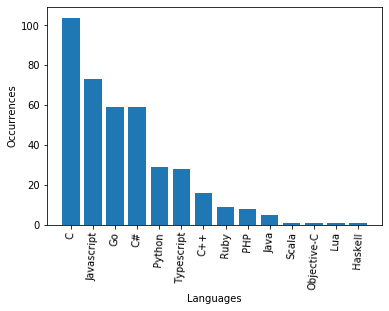

In [0]:
values = (key_value[0][1], key_value[1][1], key_value[2][1], key_value[3][1],
         key_value[4][1], key_value[5][1], key_value[6][1], key_value[7][1],
         key_value[8][1], key_value[9][1], key_value[10][1], key_value[11][1],
         key_value[12][1], key_value[13][1]
        )
label = (key_value[0][0], key_value[1][0], key_value[2][0], key_value[3][0],
          key_value[4][0], key_value[5][0], key_value[6][0], key_value[7][0],
          key_value[8][0], key_value[9][0], key_value[10][0], key_value[11][0],
          key_value[12][0], key_value[13][0]
         )

index = np.arange(len(label))

plt.bar(index, values)


plt.xlabel('Languages', fontsize=10)
plt.ylabel('Occurrences', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=87)
plt.title('')

# Acessando o google drive para salvar o arquivo na pasta compartilhada
#from google.colab import drive
#drive.mount('/content/gdrive')
#plt.savefig('/content/gdrive/My Drive/LargeFiles/images/large-files-distribution.eps', format='eps', dpi = 300,  bbox_inches='tight')

plt.show()

## Quantidade final de Projetos e arquivos

In [0]:
count_project = 0
for i in range(len(key_value)):
    count_project += key_value[i][1]


print(f'Quantidade de arquivos de codigo: {count_project}')
print(f'Quantidade de projetos: {len(dfx1.Project_Name.unique())}')

Quantidade de arquivos de codigo: 394
Quantidade de projetos: 79


## Ocorrencia das linguagens

In [0]:
print(f'Ocorrencia de arquivos: ')
key_value


Ocorrencia de arquivos: 


[('C', 104),
 ('Javascript', 73),
 ('Go', 59),
 ('C#', 59),
 ('Python', 29),
 ('Typescript', 28),
 ('C++', 16),
 ('Ruby', 9),
 ('PHP', 8),
 ('Java', 5),
 ('Scala', 1),
 ('Objective-C', 1),
 ('Lua', 1),
 ('Haskell', 1)]

## Ocorrencia de arquivos C, C++ e C#

In [0]:
c_sharp = key_value[0][1]
c = key_value[1][1]
cpp = key_value[5][1]

value_C =  c_sharp + c + cpp
print(f'Soma dos valores: {value_C}')

print(f'Percentual de ocorrencia da linguagem: {round((value_C*100)/sum(size_list), 2)}')

Soma dos valores: 205
Percentual de ocorrencia da linguagem: 52.03


## Ocorrencia de linguagem procedural

In [0]:
c_sharp = key_value[0][1]
c = key_value[1][1]
cpp = key_value[5][1]
go = key_value[2][1]
java = key_value[8][1]
objective_c = key_value[10][1]

print(f'Ocorrencia de linguagem procedural {c_sharp + c + cpp + go + java + objective_c}')

Ocorrencia de linguagem procedural 273


## Ocorrencia de linguagem scrip

In [0]:
javaScript = key_value[3][1]
python = key_value[4][1]
typeScript = key_value[6][1]
ruby = key_value[7][1]
php = key_value[9][1]
lua = key_value[12][1]

print('Ocorrencia de linguagem script {}'.format(javaScript + python + typeScript + ruby + php + lua ))

Ocorrencia de linguagem script 119


## Projeto Com 1 Large Files

In [0]:

project_list = dfx1.Project_Name.unique().tolist()
count = 0
for project in project_list:

    large_ = len(dfx1.loc[dfx1['Project_Name'] == project].File_Name.unique())
    if(large_ == 1):
        count+=1
        print(f'Nome do projeto {project} - quantidade {large_}')

print(f'\n\nQuantidade total de projetos {count}')

Nome do projeto cabal-cabal-install-v2.0.0.0 - quantidade 1
Nome do projeto ILSpy-3.1-final - quantidade 1
Nome do projeto spark-2.3.0 - quantidade 1
Nome do projeto cphalcon-3.3.2 - quantidade 1
Nome do projeto zxcvbn-4.4.2 - quantidade 1
Nome do projeto brackets-release-1.12 - quantidade 1
Nome do projeto jquery-3.3.1 - quantidade 1
Nome do projeto FFmpeg-n4.0 - quantidade 1
Nome do projeto WordPress-4.9.5 - quantidade 1
Nome do projeto obs-studio-21.1.1 - quantidade 1
Nome do projeto Faker-1.7.0 - quantidade 1
Nome do projeto october-1.0.435 - quantidade 1
Nome do projeto material-ui-1.0.0-beta.43 - quantidade 1
Nome do projeto moment-2.22.1 - quantidade 1
Nome do projeto moby-17.03.2-ce - quantidade 1
Nome do projeto ionic-0.2.2 - quantidade 1
Nome do projeto winjs-4.4.4 - quantidade 1
Nome do projeto nw.js-nw-v0.30.0 - quantidade 1
Nome do projeto XX-Net-3.11.9 - quantidade 1
Nome do projeto kotlin-native-0.7 - quantidade 1
Nome do projeto Eve-0.2.3 - quantidade 1
Nome do projeto 

## Projeto Com 2 - 9 Large Files

In [0]:

project_list = dfx1.Project_Name.unique().tolist()
count = 0
for project in project_list:
 
    large_ = len(dfx1.loc[dfx1['Project_Name'] == project].File_Name.unique())
    if((large_ >= 2) and (large_ <= 9)):
        count+=1
        print(f'Nome do projeto {project} - quantidade {large_}')

print(f'\n\nQuantidade total de projetos {count}')

Nome do projeto vim-8.0.1763 - quantidade 2
Nome do projeto php-src-7.2.5 - quantidade 7
Nome do projeto protobuf-3.5.0.1 - quantidade 4
Nome do projeto sqlitebrowser-3.10.1 - quantidade 2
Nome do projeto pandas-0.22.0 - quantidade 2
Nome do projeto opencv-3.4.1 - quantidade 4
Nome do projeto matomo-3.5.0-b2 - quantidade 8
Nome do projeto three.js-r92 - quantidade 7
Nome do projeto emscripten-1.37.38 - quantidade 6
Nome do projeto rethinkdb-2.3.6 - quantidade 2
Nome do projeto tesseract-4.0.0-beta.1 - quantidade 2
Nome do projeto meteor-release-METEOR-1.6.1.1 - quantidade 4
Nome do projeto lantern-4.5.9 - quantidade 7
Nome do projeto esprima-4.0.0 - quantidade 2
Nome do projeto libgdx-gdx-parent-1.9.8 - quantidade 6
Nome do projeto jieba-0.39 - quantidade 3
Nome do projeto gitlabhq-10.7.1 - quantidade 2
Nome do projeto scikit-learn-0.19.1 - quantidade 6
Nome do projeto angular.js-1.6.10 - quantidade 6
Nome do projeto LightTable-0.8.1 - quantidade 4
Nome do projeto discourse-1.9.5 - qua

## Projeto Com 10 - 49 Large Files

In [0]:

project_list = dfx1.Project_Name.unique().tolist()
count = 0
for project in project_list:
    large_ = len(dfx1.loc[dfx1['Project_Name'] == project].File_Name.unique())
    if((large_ >= 10) and (large_ <= 49)):
        count+=1
        print(f'Nome do projeto {project} - quantidade {large_}')

print(f'\n\nQuantidade total de projetos {count}')

Nome do projeto ruby-2.5.1 - quantidade 12
Nome do projeto go-go1.10 - quantidade 13
Nome do projeto roslyn-15.6 - quantidade 13
Nome do projeto corefx-1.0.11 - quantidade 10
Nome do projeto coreclr-2.0.7 - quantidade 32
Nome do projeto kubernetes-1.9.7 - quantidade 10
Nome do projeto angular-5.2.10 - quantidade 24


Quantidade total de projetos 7


## Projeto Com 50 - 99 Large Files

In [0]:
project_list = dfx1.Project_Name.unique().tolist()
count = 0
for project in project_list:
    large_ = len(dfx1.loc[dfx1['Project_Name'] == project].File_Name.unique())
    if((large_ >= 50) and (large_ <= 99)):
        count+=1
        print(f'Nome do projeto {project} - quantidade {large_}')

print(f'\n\nQuantidade total de projetos {count}')

Nome do projeto cpython-3.6.5 - quantidade 91


Quantidade total de projetos 1


### Selecione uns 400 arquivos aleatoriamente, coloque numa planilha, e compartilhe conosco. A idea é entender o que esses arquivos grandes fazem. Pra isso, precisamos que você de uma passada nesses 400 arquivos, e tente inferir pelo nome, metodos, variaveis, etc, o que esses arquivos fazem.

In [0]:

for language in language_list:

    teste = []

    project_sum = []
    df_language = dfx1.loc[dfx1['Extension'] == language]
    project_list = df_language.Project_Name.unique().tolist()

    for project in project_list:

        teste = df_language.loc[df_language['Project_Name'] == project].File_Name.unique().tolist()
        
        for i in teste:
            print('\n\n')

            print(dfx1.loc[(dfx1['Project_Name'] == project) & (dfx1['File_Name'] == i)].iloc[0][1], ', ',
                   dfx1.loc[(dfx1['Project_Name'] == project) & (dfx1['File_Name'] == i)].iloc[0][2], ', ',
                   dfx1.loc[(dfx1['Project_Name'] == project) & (dfx1['File_Name'] == i)].iloc[0][13])
            
            count+=1  
print(count)




unicodedatabase ,  c ,  cpython-3.6.5



posixmodule ,  c ,  cpython-3.6.5



traceback ,  c ,  cpython-3.6.5



signalmodule ,  c ,  cpython-3.6.5



sysmodule ,  c ,  cpython-3.6.5



dbmmodule ,  c ,  cpython-3.6.5



thread ,  c ,  cpython-3.6.5



_hotshot ,  c ,  cpython-3.6.5



stringobject ,  c ,  cpython-3.6.5



timemodule ,  c ,  cpython-3.6.5



readline ,  c ,  cpython-3.6.5



socketmodule ,  c ,  cpython-3.6.5



resource ,  c ,  cpython-3.6.5



termios ,  c ,  cpython-3.6.5



_Qtmodule ,  c ,  cpython-3.6.5



selectmodule ,  c ,  cpython-3.6.5



NEWS ,  py ,  cpython-3.6.5



ceval ,  c ,  cpython-3.6.5



spwdmodule ,  c ,  cpython-3.6.5



fileobject ,  c ,  cpython-3.6.5



unicodeobject ,  c ,  cpython-3.6.5



getbuildinfo ,  c ,  cpython-3.6.5



swimodule ,  c ,  cpython-3.6.5



HISTORY ,  c ,  cpython-3.6.5



zlibmodule ,  c ,  cpython-3.6.5



_cursesmodule ,  c ,  cpython-3.6.5



_testcapimodule ,  c ,  cpython-3.6.5



_struct ,  c ,  cpython-3.6.5